In [274]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [275]:
df = pd.read_excel('data.xlsx')

In [276]:
df.head(100)

,No.,composition,ICSD #,Element,magn.,Ev,X1,X2,X3,X4,X5,X6
0,51,Ag2O2,202543,2,non,2.4,1.5,4,110,2,0.500000,0.145455
1,127,Al2O3,161062,2,non,6.5,1.8,5,50,3,0.600000,0.480000
2,128,Al2O3,82504,2,non,6.6,1.8,5,50,3,0.600000,0.480000
3,129,Al2O3,161061,2,non,6.6,1.8,5,50,3,0.600000,0.480000
4,130,Al2O3,161790,2,non,6.7,1.8,5,50,3,0.600000,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1447,O2Pt1,30443,2,AFM,2.7,1.2,3,94,2,0.666667,0.170213
96,1448,O2Pt1,76431,2,FM,2.9,1.2,3,94,2,0.666667,0.170213
97,1449,O2Pt1,24923,2,AFM,3.0,1.2,3,94,2,0.666667,0.170213
98,1456,O2Si1,170519,2,non,4.5,1.5,3,30,2,0.666667,0.533333


In [277]:
df.describe()

,No.,ICSD #,Element,Ev,X1,X2,X3,X4,X5,X6
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,875.500000,115104.005143,3.128571,4.931371,1.647771,31.868571,176.077143,6.231429,0.446981,0.304382
std,505.325802,109984.787141,0.672107,0.989524,0.234266,41.484019,156.687028,6.042033,0.225982,0.110418
min,1.000000,91.000000,2.000000,1.500000,0.700000,2.000000,20.000000,1.000000,0.012346,0.023881
25%,438.250000,33771.750000,3.000000,4.200000,1.500000,5.000000,86.000000,3.000000,0.203912,0.225352
50%,875.500000,80045.500000,3.000000,5.000000,1.600000,9.000000,134.000000,4.000000,0.571429,0.295567
75%,1312.750000,167743.750000,4.000000,5.700000,1.800000,55.000000,222.000000,8.000000,0.615385,0.375000
max,1750.000000,657748.000000,5.000000,7.300000,2.600000,211.000000,2584.000000,96.000000,0.904762,0.703704


In [278]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [279]:
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1400
No. of testing examples: 350


In [280]:
for col in df.columns:
    print(col)

No.
composition
ICSD #
Element
magn.
Ev
X1
X2
X3
X4
X5
X6


In [281]:
training_data.head()

,No.,composition,ICSD #,Element,magn.,Ev,X1,X2,X3,X4,X5,X6
1537,823,Fe1Ge2O7Y1,95935,4,AFM,4.4,1.4,105,185,7,0.066667,0.302703
1149,1598,O3Pd1Sr2,16536,3,FM,3.4,1.2,6,146,3,0.500000,0.164384
1468,519,Ca3Co1O6Rh1,50809,4,AFM,3.5,1.3,100,180,6,0.060000,0.266667
553,673,Cr1Na2O4,159511,3,AFM,4.6,1.8,7,78,4,0.571429,0.410256
1365,251,Ba1Mn2O8V2,72295,4,AFM,5.3,1.8,112,216,8,0.071429,0.296296


In [282]:
ds = df

## Stepwise regression

In [283]:
x_columns = ["X1","X2","X3","X4","X5","X6"]
y = ds["Ev"]

In [284]:
import statsmodels.api as sm

In [285]:
pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [286]:
def get_stats():
    x = ds[x_columns]
    results = sm.OLS(y,x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     Ev   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.745e+04
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:08:48   Log-Likelihood:                         -1712.4
No. Observations:                1750   AIC:                                      3437.
Df Residuals:                    1744   BIC:                                      3470.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [287]:
x_columns.remove("X3")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     Ev   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.096e+04
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:08:48   Log-Likelihood:                         -1712.4
No. Observations:                1750   AIC:                                      3435.
Df Residuals:                    1745   BIC:                                      3462.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [288]:
x_columns.remove("X4")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     Ev   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.619e+04
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:08:48   Log-Likelihood:                         -1712.9
No. Observations:                1750   AIC:                                      3434.
Df Residuals:                    1746   BIC:                                      3456.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [289]:
x_columns.remove("X5")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                     Ev   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.488e+04
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:08:48   Log-Likelihood:                         -1714.6
No. Observations:                1750   AIC:                                      3435.
Df Residuals:                    1747   BIC:                                      3452.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [290]:
from sklearn.linear_model import LinearRegression

In [291]:
x_columns

['X1', 'X2', 'X6']

In [292]:
y_train = training_data["Ev"]
x_train = training_data[x_columns]
y_test = testing_data["Ev"]
x_test = testing_data[x_columns]
linear_model = LinearRegression()
linear_model.fit(x_test,y_test)

y_pred = linear_model.predict(x_test)

# y_pred = ḷinear_model.predict(x)
print(linear_model.coef_)


[1.87415175e+00 1.77279874e-03 5.41718091e+00]


In [293]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.5
Mean squared error = 0.41
Median absolute error = 0.4
Explain variance score = 0.54
R2 score = 0.54


In [294]:
# https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922
# #   

In [295]:
y_train = training_data["Ev"]
x_train = training_data[["X3","X6"]]
y_test = testing_data["Ev"]
x_test = testing_data[["X3","X6"]]
linear_model = LinearRegression()
linear_model.fit(x_test,y_test)

y_pred = linear_model.predict(x_test)

# y_pred = ḷinear_model.predict(x)
print(linear_model.coef_)


[-1.08786442e-04  4.81354753e+00]


In [296]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.58
Mean squared error = 0.59
Median absolute error = 0.45
Explain variance score = 0.34
R2 score = 0.34


## Robust linear

In [297]:
import matplotlib.pyplot as plt

In [298]:
ds = df

In [299]:
x1 = ds["X1"]
x2 = ds["X2"]
x3 = ds["X3"]
x4 = ds["X4"]
x5 = ds["X5"]
x6 = ds["X6"]
y = ds["Ev"]

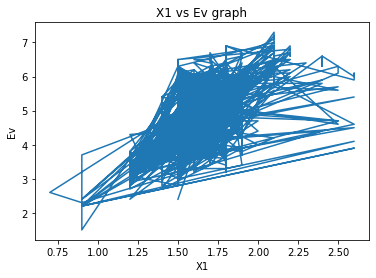

In [300]:
plt.plot(x1,y)
plt.xlabel('X1')
plt.ylabel('Ev')
plt.title('X1 vs Ev graph')
plt.show()

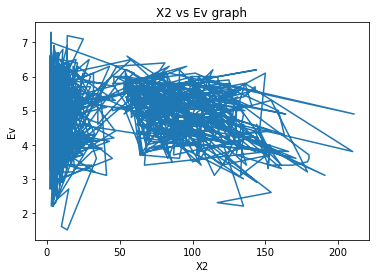

In [301]:
plt.plot(x2,y)
plt.xlabel('X2')
plt.ylabel('Ev')
plt.title('X2 vs Ev graph')
plt.show()

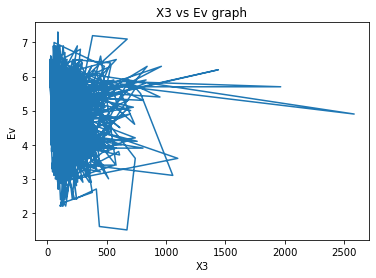

In [302]:
plt.plot(x3,y)
plt.xlabel('X3')
plt.ylabel('Ev')
plt.title('X3 vs Ev graph')
plt.show()

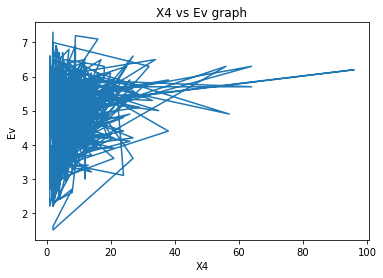

In [303]:
plt.plot(x4,y)
plt.xlabel('X4')
plt.ylabel('Ev')
plt.title('X4 vs Ev graph')
plt.show()

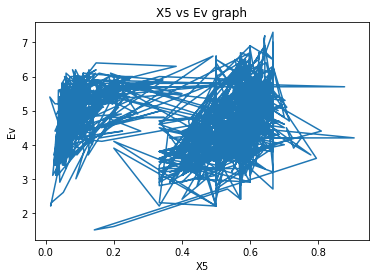

In [304]:
plt.plot(x5,y)
plt.xlabel('X5')
plt.ylabel('Ev')
plt.title('X5 vs Ev graph')
plt.show()

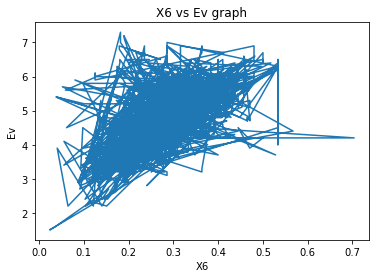

In [305]:
plt.plot(x6,y)
plt.xlabel('X6')
plt.ylabel('Ev')
plt.title('X6 vs Ev graph')
plt.show()

In [306]:
import seaborn as sns

from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	  RANSACRegressor, TheilSenRegressor)

## Robust regression for X1 vs Y

In [307]:
coef_list = []

In [308]:
X1 = np.array(x1)
X1 = X1.reshape(-1,1)
Y = np.array(y)
# Y = Y.reshape(-1,1)
lr = LinearRegression().fit(X1, Y)

coef_list.append(["linear_regression", lr.coef_[0]])

In [309]:
coef_list

[['linear_regression', 1.8901377839363276]]

In [310]:
x1.ndim

1

In [311]:
plotline_X = np.arange(X1.min(), X1.max()).reshape(-1,1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

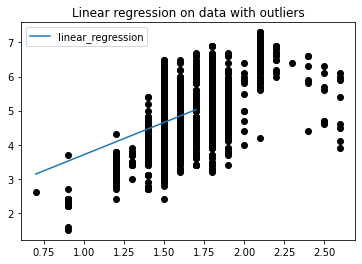

In [312]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X1, Y, c="k")
plt.title("Linear regression on data with outliers");

In [313]:
huber = HuberRegressor().fit(X1, Y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

In [314]:
ransac = RANSACRegressor(random_state=42).fit(X1, Y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [315]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")


Total outliers: 842


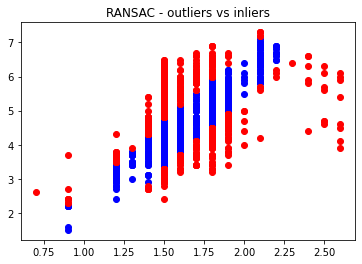

In [316]:
plt.scatter(X1[inlier_mask], Y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X1[outlier_mask], Y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

In [317]:
theilsen = TheilSenRegressor(random_state=42).fit(X1, Y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

In [318]:
coef_list

[['linear_regression', 1.8901377839363276],
 ['huber_regression', 2.105950960688553],
 ['ransac_regression', 3.7043724218327876],
 ['theilsen_regression', 2.1604852200214575]]

In [319]:
y_train = training_data["Ev"]
x_train = training_data["X1"]
y_test = testing_data["Ev"]
x_test = testing_data["X1"]
theilsen = TheilSenRegressor(random_state=42).fit(X1, Y)

x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = theilsen.predict(x_test)



import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.73
Mean squared error = 0.8
Median absolute error = 0.68
Explain variance score = 0.11
R2 score = 0.11


In [320]:
y_train = training_data["Ev"]
x_train = training_data["X1"]
y_test = testing_data["Ev"]
x_test = testing_data["X1"]
ransac = RANSACRegressor(random_state=42).fit(X1, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = ransac.predict(x_test)


import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.84
Mean squared error = 1.18
Median absolute error = 0.63
Explain variance score = -0.16
R2 score = -0.33


In [321]:
y_train = training_data["Ev"]
x_train = training_data["X1"]
y_test = testing_data["Ev"]
x_test = testing_data["X1"]
huber = HuberRegressor().fit(X1, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = huber.predict(x_test)




import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.73
Mean squared error = 0.8
Median absolute error = 0.7
Explain variance score = 0.12
R2 score = 0.1


## Robust regression for X3 vs Y

In [322]:
coef_list = []

In [323]:
X3 = np.array(x3)
X3 = X3.reshape(-1,1)
Y = np.array(y)
# Y = Y.reshape(-1,1)
lr = LinearRegression().fit(X3, Y)

coef_list.append(["linear_regression", lr.coef_[0]])

In [324]:
plotline_X = np.arange(X3.min(), X3.max()).reshape(-1,1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

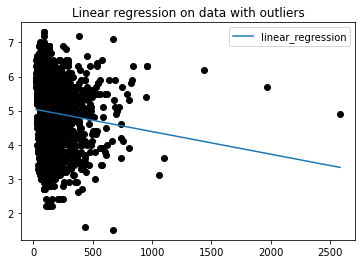

In [325]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X3, Y, c="k")
plt.title("Linear regression on data with outliers");

In [326]:
huber = HuberRegressor().fit(X3, Y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

In [327]:
ransac = RANSACRegressor(random_state=42).fit(X3, Y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [328]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")


Total outliers: 881


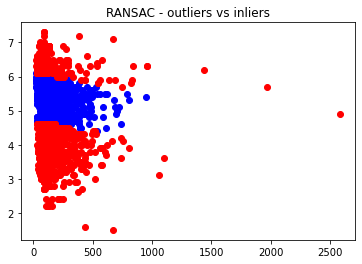

In [329]:
plt.scatter(X3[inlier_mask], Y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X3[outlier_mask], Y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

In [330]:
theilsen = TheilSenRegressor(random_state=42).fit(X3, Y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

In [331]:
coef_list

[['linear_regression', -0.0006635709875490117],
 ['huber_regression', -0.0008830592977474236],
 ['ransac_regression', -0.0006308004392566923],
 ['theilsen_regression', -0.0020722152489935177]]

In [332]:
y_train = training_data["Ev"]
x_train = training_data["X3"]
y_test = testing_data["Ev"]
x_test = testing_data["X3"]
theilsen = TheilSenRegressor(random_state=42).fit(X3, Y)

x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = theilsen.predict(x_test)



import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.79
Mean squared error = 0.93
Median absolute error = 0.72
Explain variance score = -0.04
R2 score = -0.04


In [333]:
y_train = training_data["Ev"]
x_train = training_data["X3"]
y_test = testing_data["Ev"]
x_test = testing_data["X3"]
ransac = RANSACRegressor(random_state=42).fit(X3, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = ransac.predict(x_test)


import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.79
Mean squared error = 0.95
Median absolute error = 0.66
Explain variance score = 0.01
R2 score = -0.07


In [334]:
y_train = training_data["Ev"]
x_train = training_data["X3"]
y_test = testing_data["Ev"]
x_test = testing_data["X3"]
huber = HuberRegressor().fit(X3, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = huber.predict(x_test)




import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.78
Mean squared error = 0.88
Median absolute error = 0.7
Explain variance score = 0.01
R2 score = 0.01


## Robust regression for X4 vs Y

In [335]:
coef_list = []

In [336]:
X4 = np.array(x4)
X4 = X4.reshape(-1,1)
Y = np.array(y)
# Y = Y.reshape(-1,1)
lr = LinearRegression().fit(X4, Y)

coef_list.append(["linear_regression", lr.coef_[0]])

In [337]:
plotline_X = np.arange(X4.min(), X4.max()).reshape(-1,1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

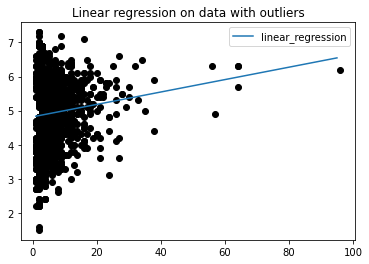

In [338]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X4, Y, c="k")
plt.title("Linear regression on data with outliers");

In [339]:
huber = HuberRegressor().fit(X4, Y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

In [340]:
ransac = RANSACRegressor(random_state=42).fit(X4, Y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [341]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")


Total outliers: 888


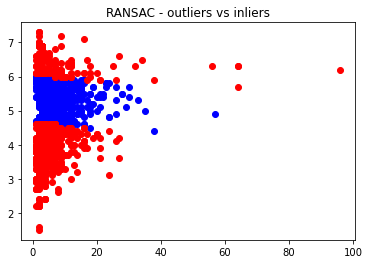

In [342]:
plt.scatter(X4[inlier_mask], Y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X4[outlier_mask], Y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

In [343]:
theilsen = TheilSenRegressor(random_state=42).fit(X4, Y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

In [344]:
coef_list

[['linear_regression', 0.018205291077267018],
 ['huber_regression', 0.018469794907428814],
 ['ransac_regression', -0.005618042639575837],
 ['theilsen_regression', 0.07513568911384166]]

In [345]:
y_train = training_data["Ev"]
x_train = training_data["X4"]
y_test = testing_data["Ev"]
x_test = testing_data["X4"]
theilsen = TheilSenRegressor(random_state=42).fit(X4, Y)

x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = theilsen.predict(x_test)



import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.83
Mean squared error = 1.11
Median absolute error = 0.72
Explain variance score = -0.25
R2 score = -0.25


In [346]:
y_train = training_data["Ev"]
x_train = training_data["X4"]
y_test = testing_data["Ev"]
x_test = testing_data["X4"]
ransac = RANSACRegressor(random_state=42).fit(X4, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = ransac.predict(x_test)


import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.8
Mean squared error = 0.98
Median absolute error = 0.65
Explain variance score = -0.01
R2 score = -0.1


In [347]:
y_train = training_data["Ev"]
x_train = training_data["X4"]
y_test = testing_data["Ev"]
x_test = testing_data["X4"]
huber = HuberRegressor().fit(X4, Y)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
y_pred = huber.predict(x_test)




import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 0.78
Mean squared error = 0.89
Median absolute error = 0.69
Explain variance score = 0.01
R2 score = 0.0


## Gradient Boosting Regressor

In [348]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [349]:
ds = df

In [350]:
X = training_data[["X1","X2","X3","X4","X5","X6"]]
Y = training_data["Ev"]
X_test = testing_data[["X1","X2","X3","X4","X5","X6"]]
Y_test = testing_data["Ev"]

In [351]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X, Y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [352]:
errors = [mean_squared_error(Y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [353]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X,Y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=2)

In [354]:
y_pred = best_regressor.predict(X_test)
print("MSE: ",mean_absolute_error(Y_test, y_pred))
print("MAE: ",mean_squared_error(Y_test, y_pred))
print("Accuracy",best_regressor.score(X_test,Y_test))

MSE:  0.48341308670753586
MAE:  0.378708297972369
Accuracy 0.574793009331511


## Linear SVM

In [355]:
ds = df

In [356]:
X = training_data[["X1","X2","X3","X4","X5","X6"]]
Y = training_data["Ev"]
X_test = testing_data[["X1","X2","X3","X4","X5","X6"]]
Y_test = testing_data["Ev"]

In [357]:
Y = np.array(Y)
Y_test = np.array(Y_test)
Y = Y.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [358]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)
X_test = sc_X.fit_transform(X_test)
Y_test = sc_y.fit_transform(Y_test)

In [359]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

C:\Users\chugh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [360]:
y_pred = regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred) 

In [361]:
from sklearn.metrics import accuracy_score
regressor.score(X_test,Y_test)

0.6968895440206088

## Linear SVM with X1, X2, X6

In [362]:
X = training_data[["X1","X2","X6"]]
Y = training_data["Ev"]
X_test = testing_data[["X1","X2","X6"]]
Y_test = testing_data["Ev"]

In [363]:
Y = np.array(Y)
Y_test = np.array(Y_test)
Y = Y.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [364]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)
X_test = sc_X.fit_transform(X_test)
Y_test = sc_y.fit_transform(Y_test)

In [365]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

C:\Users\chugh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [366]:
y_pred = regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred) 

In [367]:
# from sklearn.metrics import accuracy_score
regressor.score(X_test,Y_test)

0.6749014878912282

## Linear  ANN

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [390]:
observations=1750
ds = df
generated_inputs=np.column_stack([ds['X1'],ds['X2'],ds['X3'],ds['X4'],ds['X5'],ds['X6']])

generated_target=ds["Ev"]

array([[1.50000000e+00, 4.00000000e+00, 1.10000000e+02, 2.00000000e+00,
        5.00000000e-01, 1.45454545e-01],
       [1.80000000e+00, 5.00000000e+00, 5.00000000e+01, 3.00000000e+00,
        6.00000000e-01, 4.80000000e-01],
       [1.80000000e+00, 5.00000000e+00, 5.00000000e+01, 3.00000000e+00,
        6.00000000e-01, 4.80000000e-01],
       ...,
       [1.50000000e+00, 9.10000000e+01, 2.84000000e+02, 1.50000000e+01,
        1.64835165e-01, 4.22535211e-01],
       [1.50000000e+00, 9.60000000e+01, 3.84000000e+02, 1.50000000e+01,
        1.56250000e-01, 3.12500000e-01],
       [1.70000000e+00, 8.50000000e+01, 1.74000000e+02, 7.00000000e+00,
        8.23529410e-02, 3.21839080e-01]])

In [391]:
np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')

In [394]:
input_size=6
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)

Epoch 1/100
55/55 [==============================] - 0s 1ms/step - loss: nan  
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/100
55/55 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/100
55/55 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/100
55/55 [==============================] - 0s 1ms/step - los

In [395]:
models.layers[0].get_weights()


[array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], dtype=float32),
 array([nan], dtype=float32)]

In [396]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [397]:
out=training_data['targets'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.0

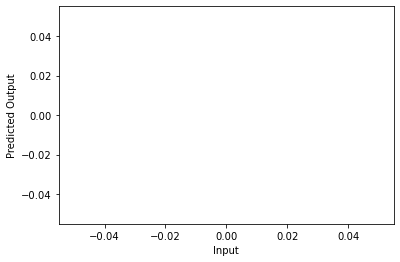

In [398]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()

In [381]:
observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=2*xs-3*zs+5+noise

In [384]:
np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')

In [389]:
generated_inputs

array([[ 6.01568773, -4.89998132],
       [ 1.11628388, -6.66774796],
       [-5.15325252,  4.17310225],
       ...,
       [-2.38861309,  3.49200824],
       [ 8.48439818,  9.89502596],
       [ 1.89427252,  2.50244743]])